`Programmed By : Rithik Tripathi`

[Connect with me on Linkedin](https://www.linkedin.com/in/rithik-tripathi-data-scientist/)

# Cost Function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse 

C:\Users\rkt7k\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# creating the sample dataset
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

df = pd.DataFrame({
    'experience' : experience,
    'salary' : salary
})
df.head()

,experience,salary
0,1.2,1.7
1,1.5,2.4
2,1.9,2.3
3,2.2,3.1
4,2.4,3.7


##### Defining a Linear Regression Equation to Predict Salary 
(Variables taken as constant for demonstration)

In [3]:
pred_salary = np.array(experience)*1.7 - 0.7
df['pred_salary'] = pred_salary

In [4]:
df.head()

,experience,salary,pred_salary
0,1.2,1.7,1.34
1,1.5,2.4,1.85
2,1.9,2.3,2.53
3,2.2,3.1,3.04
4,2.4,3.7,3.38


##### Calculating error 

In [5]:
df['error'] = df['salary'] - df['pred_salary']
error = salary - pred_salary # storing in array 

##### Calculating MSE

In [6]:
# method 1
np.square(error).sum()/len(error)

0.3383500000000003

In [7]:
# method 2
mse(df.salary, df.pred_salary)

0.3383500000000003

### Visualizing Data

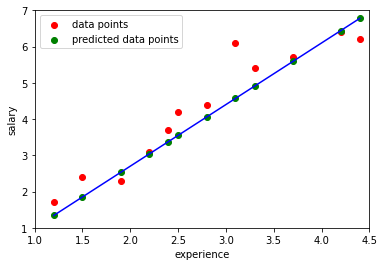

In [8]:
plt.scatter(df.experience, df.salary, color = 'red', label = 'data points')
plt.scatter(df.experience, df.pred_salary, color = 'green', label = 'predicted data points')
plt.plot(df.experience, df.pred_salary, '-b')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('experience')
plt.ylabel('salary')
plt.legend()

# data follows linear curve
# blue line demonstrates the best fit line

### Try playing around with the values of beta and b here to observe the change in fitting line

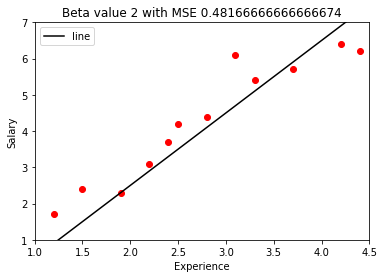

In [9]:
beta = 2
b = 1.5

#predicted points
line1 = np.array(experience)*beta - b

# Plotting the line
plt.scatter(df.experience, df.salary, color = 'red')
plt.plot(df.experience, line1, color = 'black', label = 'line')
plt.xlim(1,4.5)
plt.ylim(1,7)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.legend()
MSE = mse(df.salary, line1)
plt.title("Beta value "+str(beta)+" with MSE "+ str(MSE))
MSE = mse(df.salary, line1)

### Calculating error for a range of values of Beta

In [15]:
def calc_error(beta, df):
    
    b = 1.1 # considering b as constant
    
    pred_salary = df.experience*beta + b  # predictions for each data point
    
    MSE = mse(df.salary, pred_salary) # calculating MSE for current Beta value predicitons 
    
    return MSE

In [19]:
# Calculating Cost (Errors) for raneg of Beta (slope) values
slope = [i/100 for i in range(0,300)]
costs = []

for i in slope:
    cost = calc_error(beta= i, df= df)
    costs.append(cost)
    
# Arranging in a DataFrame
cost_df = pd.DataFrame({
    'Beta' : slope,
    'Cost' : costs
})
cost_df.head()

,Beta,Cost
0,0.00,12.791667
1,0.01,12.585876
2,0.02,12.381806
3,0.03,12.179455
4,0.04,11.978824


### Visualising Cost v/s Beta

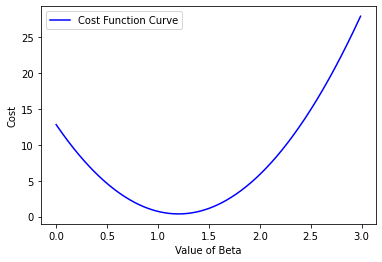

In [20]:
# plotting the cost values corresponding to every value of Beta
plt.plot(cost_df.Beta, cost_df.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of Beta')
plt.ylabel('Cost')
plt.legend()

In [35]:
# Method 1 => Calc. lowest cost and then locate respective Beta with index location of cost
min_cost= cost_df[cost_df['Cost'] == cost_df['Cost'].min()].index
best_beta = cost_df.iloc[min_cost]['Beta']
best_beta

120    1.2
Name: Beta, dtype: float64

In [40]:
# Method 2 => Sort Dataframe w.r.t Cost and get the beta value of 0th row
cost_df.sort_values(by='Cost')['Beta'].iloc[0]

1.2